### Load libraries

In [4]:
library(plyr)
library(tidyverse)
library(stringr)
library(phyloseq)
library(microViz)
library(metagMisc)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(knitr)
library(cowplot)
library(pwr)
library(GMSE)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
ℹ Use t

### Declare conflict preferences

In [21]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


## Power analysis

In [223]:
# Set the desired significance level (alpha) and power level
alpha <- 0.05
power <- 0.8

# Define the range of effect sizes to test
effect_sizes <- seq(0.2, 1.5, by = 0.1)

# Use pwr.t.test to estimate the required sample size
#sample_size <- pwr.t.test(d = effect_size, sig.level = significance_level, power = desired_power, type = "two.sample")$n

# Create an empty data frame to store the results
result_table <- data.frame(effect_size = effect_sizes,
                           sample_size = NA,
                           power = NA)

# Loop through the effect sizes and calculate the sample size and power
for (i in seq_along(effect_sizes)) {
  es <- effect_sizes[i]
  n <- pwr.t.test(d = es, sig.level = alpha, power = power, type = "two.sample")$n
  pw <- pwr.t.test(n = n, d = es, sig.level = alpha, type = "two.sample")$power
  result_table[i, c("sample_size", "power")] <- c(n, pw)
}

# Print the result table
#print(result_table)

# Round sample size up to the nearest integer
#sample_size <- ceiling(sample_size)

# Print the estimated sample size and power level
#cat("Estimated sample size:", sample_size, "\n")
#cat("Estimated power level:", pwr.t.test(n = sample_size, d = effect_size, sig.level = significance_level, type = "two.sample", alternative = "two.sided")$power, "\n")

In [228]:
head(result_table)

,effect_size,sample_size,power
,<dbl>,<dbl>,<dbl>
1,0.2,393.40570,0.8000000
2,0.3,175.38467,0.8000000
3,0.4,99.08032,0.8000000
4,0.5,63.76561,0.8000000
5,0.6,44.58577,0.7999998
6,0.7,33.02457,0.8000000


Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


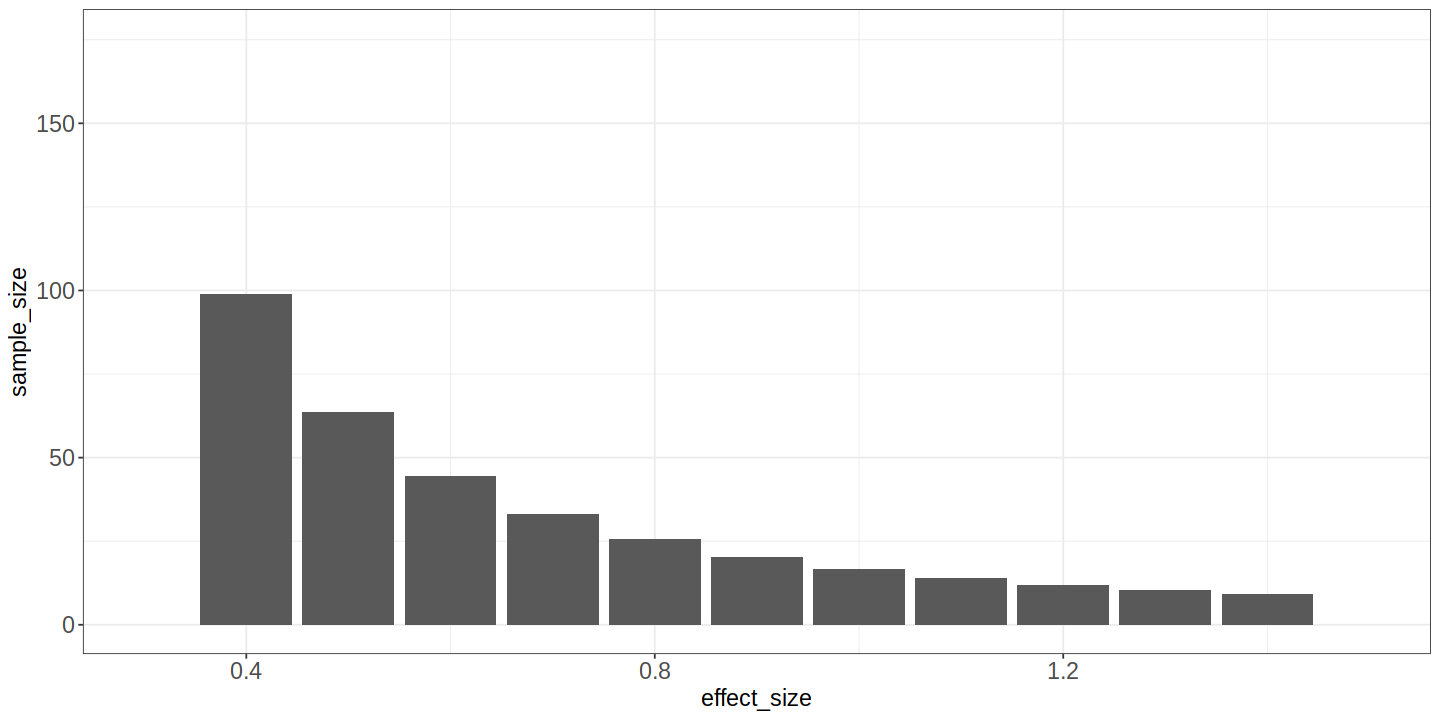

In [237]:
ggplot(result_table,aes(x=effect_size,y=sample_size))+geom_bar(stat="identity")+
theme_bw()+
xlim(0.3,1.5)+
theme(axis.title.x =  element_text(size=14),
     axis.title.y =  element_text(size=14),
     axis.text.x = element_text(size=14),
     axis.text.y = element_text(size=14))

## Subsample all phyloseq

In [568]:
psAll.filt = readRDS("psAll_count.rds")

In [570]:
psAll.filt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 785 samples ]
sample_data() Sample Data:       [ 785 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

## Option 1: To the median within each category

### Subsample animals

In [571]:
ps.animals = ps_filter(psAll.filt,biome_2%in%c("Reptilia","Amphibia","Aves","Actinopterygii","Mammalia"))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [572]:
count.animals = count(as_tibble(ps.animals@sam_data),biome_2)
count.animals

biome_2,n
<chr>,<int>
Actinopterygii,53
Amphibia,11
Aves,100
Mammalia,394
Reptilia,14


In [575]:
count.animals$biome_2

[1] "Actinopterygii" "Amphibia"       "Aves"           "Mammalia"      
[5] "Reptilia"

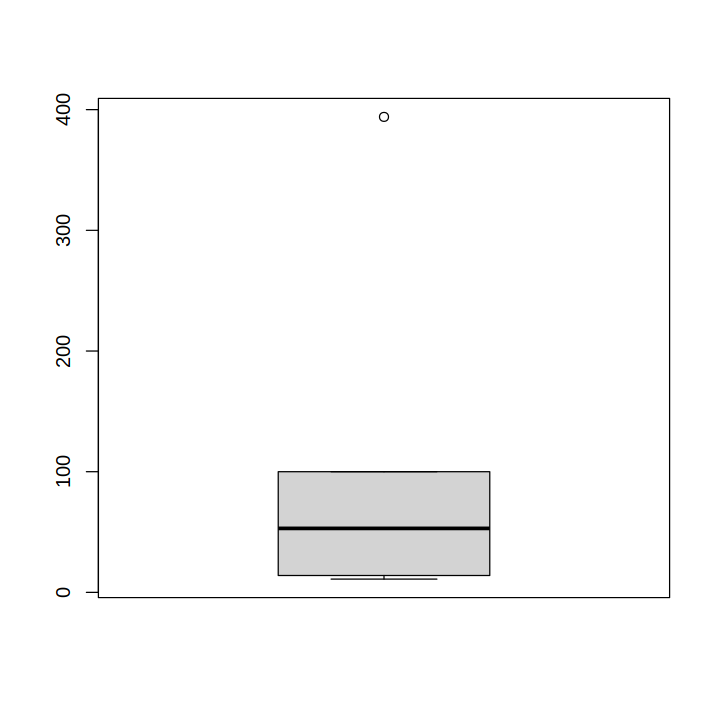

In [576]:
options(repr.plot.width=6,repr.plot.height=6)
boxplot(count.animals$n)

In [573]:
stats_animals = tibble(
    mean = mean(count.animals$n),
    median = median(count.animals$n),
    min = min(count.animals$n))

In [574]:
stats_animals

mean,median,min
<dbl>,<int>,<int>
114.4,53,11


In [577]:
#Subsample animals
minsamples_biome2 = median(table(sample_data(ps.animals)$biome_2))
samples_to_keep_biome2 <- c()
for (biome_2 in count.animals$biome_2) {
  biome_2 <- sample_names(ps.animals)[sample_data(ps.animals)$biome_2 == biome_2]
  if (length(biome_2) > minsamples_biome2) {
    biome_2 <- sample(biome_2, minsamples_biome2)
  }
  samples_to_keep_biome2 <- c(samples_to_keep_biome2, biome_2)
}

In [578]:
subsampled.animals = prune_samples(samples_to_keep_biome2,psAll.filt) #%>%
#merge_phyloseq(subsample_plants)

In [653]:
subsampled.animals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 184 samples ]
sample_data() Sample Data:       [ 184 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

### Subsample environmental

In [579]:
ps.env = ps_filter(psAll.filt,biome_2%in%c("Aquatic","Terrestrial"))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [580]:
count.env = count(as_tibble(ps.env@sam_data),biome_3)
count.env

biome_3,n
<chr>,<int>
Freshwater,28
Marine,63
Non-marine Saline and Alkaline,11
Soil,31


In [581]:
stats_env = tibble(
    mean = mean(count.env$n),
    median = median(count.env$n),
    min = min(count.env$n))

In [582]:
stats_env

mean,median,min
<dbl>,<dbl>,<int>
33.25,29.5,11


In [583]:
count.env$biome_3

[1] "Freshwater"                     "Marine"                        
[3] "Non-marine Saline and Alkaline" "Soil"

In [584]:
#Subsample environmental
phylo_object = ps.env
minsamples_biome3_env = 30#min(table(sample_data(ps_filter(psAll.filt,biome_2%in%c("Aquatic","Terrestrial")))$biome_2))
samples_to_keep_biome3_env <- c()
for (biome_3 in count.env$biome_3) {
  biome_3 <- sample_names(phylo_object)[sample_data(phylo_object)$biome_3 == biome_3]
  if (length(biome_3) > minsamples_biome3_env) {
    biome_3 <- sample(biome_3, minsamples_biome3_env)
  }
  samples_to_keep_biome3_env <- c(samples_to_keep_biome3_env, biome_3)
}

In [585]:
length(samples_to_keep_biome3_env)

[1] 99

In [586]:
subsampled.env = prune_samples(samples_to_keep_biome3_env,psAll.filt)

### Subsample plants

In [587]:
ps.plants = ps_filter(psAll.filt,biome_2=="Plants")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [588]:
count(as_tibble(ps.plants@sam_data),family,biome_3)

family,biome_3,n
<chr>,<chr>,<int>
Asparagaceae,Rhizosphere,1
Asteraceae,Rhizosphere,2
Brassicaceae,Rhizosphere,24
Paniceae,Phyllosphere,2
Paniceae,Rhizosphere,4
Poaceae,Rhizosphere,3
Salviniaceae,Phyllosphere,42
NA,Phyllosphere,1
NA,Rhizosphere,1


In [589]:
count.plants = count(as_tibble(ps.plants@sam_data),biome_3)
count.plants

biome_3,n
<chr>,<int>
Phyllosphere,45
Rhizosphere,35


In [590]:
stats_plants = tibble(
    mean = mean(count.plants$n),
    median = median(count.plants$n),
    min = min(count.plants$n))

In [591]:
stats_plants

mean,median,min
<dbl>,<dbl>,<int>
40,40,35


In [592]:
count.plants$biome_3

[1] "Phyllosphere" "Rhizosphere"

In [593]:
median(table(sample_data(ps.plants)$biome_3))

[1] 40

In [594]:
#Subsample plants
phylo_object = ps.plants
minsamples_biome3_plants = median(table(sample_data(ps.plants)$biome_3))

samples_to_keep_plants <- c()
for (biome_3 in count.plants$biome_3) {
  biome_3 <- sample_names(phylo_object)[sample_data(phylo_object)$biome_3 == biome_3]
  if (length(biome_3) > minsamples_biome3_plants) {
    biome_3 <- sample(biome_3, minsamples_biome3_plants)#length(samples_to_keep_biome2))
  }
  samples_to_keep_plants <- c(samples_to_keep_plants, biome_3)
}


In [595]:
subsampled.plants = prune_samples(samples_to_keep_plants,psAll.filt)

### Concatenate all subsampled categories

In [596]:
subsampled.all = merge_phyloseq(subsampled.animals,
              subsampled.env,
              subsampled.plants)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [597]:
subsampled.all

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 358 samples ]
sample_data() Sample Data:       [ 358 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [598]:
count(as_tibble(subsampled.all@sam_data),category)

category,n
<chr>,<int>
Animal,184
Environmental,99
Plants,75


## Option 2: Subsample to same samples/animal family

### Subsample animals - same # samples/family

In [619]:
count.family = count(as_tibble(ps.animals@sam_data),family)
count.family

family,n
<chr>,<int>
Acanthizidae,1
Accipitridae,5
Agamidae,1
Anatidae,25
Anguidae,1
Ardeidae,1
Atelidae,40
Balaenopteridae,1
Bovidae,35


In [660]:
stats_animals_fam = tibble(
    mean = mean(count.family$n),
    median = median(count.family$n),
    min = min(count.family$n))

In [661]:
stats_animals_fam

mean,median,min
<dbl>,<int>,<int>
6.426966,2,1


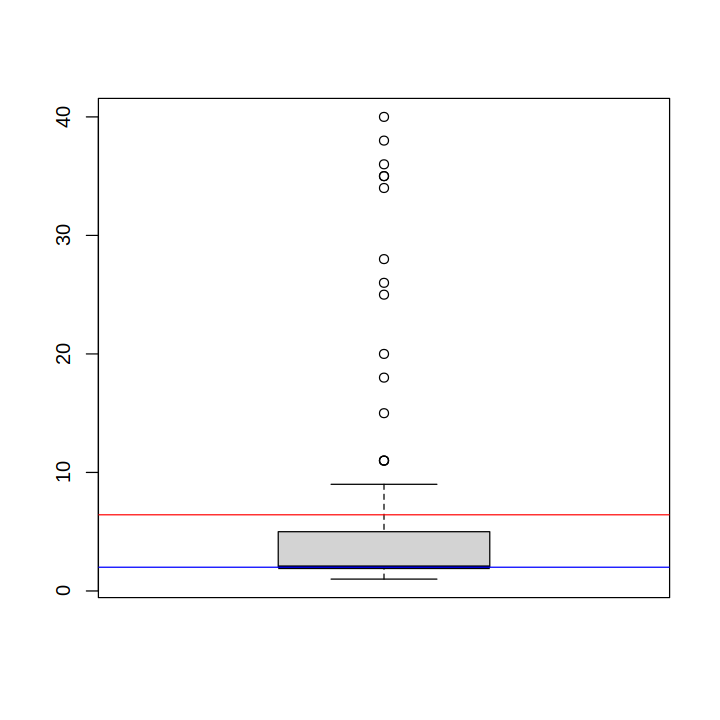

In [663]:
boxplot(count.family$n,breaks=20)
abline(h=mean(count.family$n),col="red")
abline(h=median(count.family$n),col="blue")

In [669]:
#Subsample animals to the mean of samples/family
minsamples_family = round(mean(table(sample_data(ps.animals)$family)))
samples_to_keep_family <- c()
for (family in count.family$family) {
  family <- sample_names(ps.animals)[sample_data(ps.animals)$family == family]
  if (length(family) > minsamples_family) {
    family <- sample(family, minsamples_family)
  }
  samples_to_keep_family <- c(samples_to_keep_family, family)
}

In [670]:
subsampled.animals.fam = prune_samples(samples_to_keep_family,psAll.filt) #%>%
#merge_phyloseq(subsample_plants)

In [671]:
subsampled.animals.fam

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 275 samples ]
sample_data() Sample Data:       [ 275 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [672]:
subsampled.all.2 = merge_phyloseq(subsampled.animals.fam,
              subsampled.env,
              subsampled.plants)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [673]:
subsampled.all.2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 449 samples ]
sample_data() Sample Data:       [ 449 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

In [674]:
count(as_tibble(subsampled.all.2@sam_data),category)

category,n
<chr>,<int>
Animal,275
Environmental,99
Plants,75


In [599]:
saveRDS(subsampled.all,"subsampled_median.rds")

In [290]:
#Old subsampling method: subsampling depth=51 samples/biome_2
#saveRDS(subsampled,"nonrarepsAllfilt_subsampled.rds")

## Option 3: Subsample to the minimun # samples per biome_2

In [600]:
table(as_tibble(sample_data(psAll_count)$biome_2))

value
Actinopterygii       Amphibia        Aquatic           Aves       Mammalia 
            53             11            102            100            394 
        Plants       Reptilia    Terrestrial 
            87             14             31 

In [601]:
# subsample for the same number of samples across categories
stats_samples_biome2 <- tibble(
    min = min(table(sample_data(psAll_count)$biome_2)),# define number of samples to subsample
    mean = mean(table(sample_data(psAll_count)$biome_2)),
    median = median(table(sample_data(psAll_count)$biome_2)))
stats_samples_biome2

min,mean,median
<int>,<dbl>,<dbl>
11,99,70


In [602]:
# count the number of samples in each category
table(sample_data(psAll_count)$category)


       Animal Environmental        Plants 
          572           133            87 

In [603]:
# subsample for the same number of samples across categories
stats_samples_cat <- tibble(
    min = min(table(sample_data(psAll_count)$category)),# define number of samples to subsample
    mean = mean(table(sample_data(psAll_count)$category)),
    median = median(table(sample_data(psAll_count)$category)))
stats_samples_cat

min,mean,median
<int>,<dbl>,<int>
87,264,133


In [676]:
count.biome2 = count(as_tibble(psAll_count@sam_data),biome_2)
count.biome2

biome_2,n
<chr>,<int>
Actinopterygii,53
Amphibia,11
Aquatic,102
Aves,100
Mammalia,394
Plants,87
Reptilia,14
Terrestrial,31


In [604]:
phylo_object = psAll_count

In [677]:
#Subsample to the minimum sample size
minsamples_biome2 = min(table(sample_data(psAll.filt)$biome_2))
samples_to_keep_biome2 <- c()
for (biome_2 in count.biome2$biome_2) {
  biome_2 <- sample_names(phylo_object)[sample_data(phylo_object)$biome_2 == biome_2]
  if (length(biome_2) > minsamples_biome2) {
    biome_2 <- sample(biome_2, minsamples_biome2)
  }
  samples_to_keep_biome2 <- c(samples_to_keep_biome2, biome_2)
}

In [678]:
length(samples_to_keep_biome2)

[1] 88

In [679]:
subset.all.min = prune_samples(samples_to_keep_biome2,psAll.filt)

In [680]:
subset.all.min

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9963 taxa and 86 samples ]
sample_data() Sample Data:       [ 86 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9963 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9963 tips and 9945 internal nodes ]

# OTU trees

### Option 1

In [693]:
tre.top.opt1=plot_tree(phyloseq_filter_top_taxa(subsampled.all,perc=10),color="category",label.tips="family")+
scale_color_npg()+
ggtitle("Option 1")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



### Option 2

In [694]:
tre.top.opt2=plot_tree(phyloseq_filter_top_taxa(subsampled.all.2,perc=10),color="category",label.tips="family")+
scale_color_npg()+
ggtitle("Option 2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



### Option 3

In [696]:
tre.top.opt3=plot_tree(phyloseq_filter_top_taxa(subset.all.min,perc=10),color="category",label.tips="family")+
scale_color_npg()+
ggtitle("Option 3")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



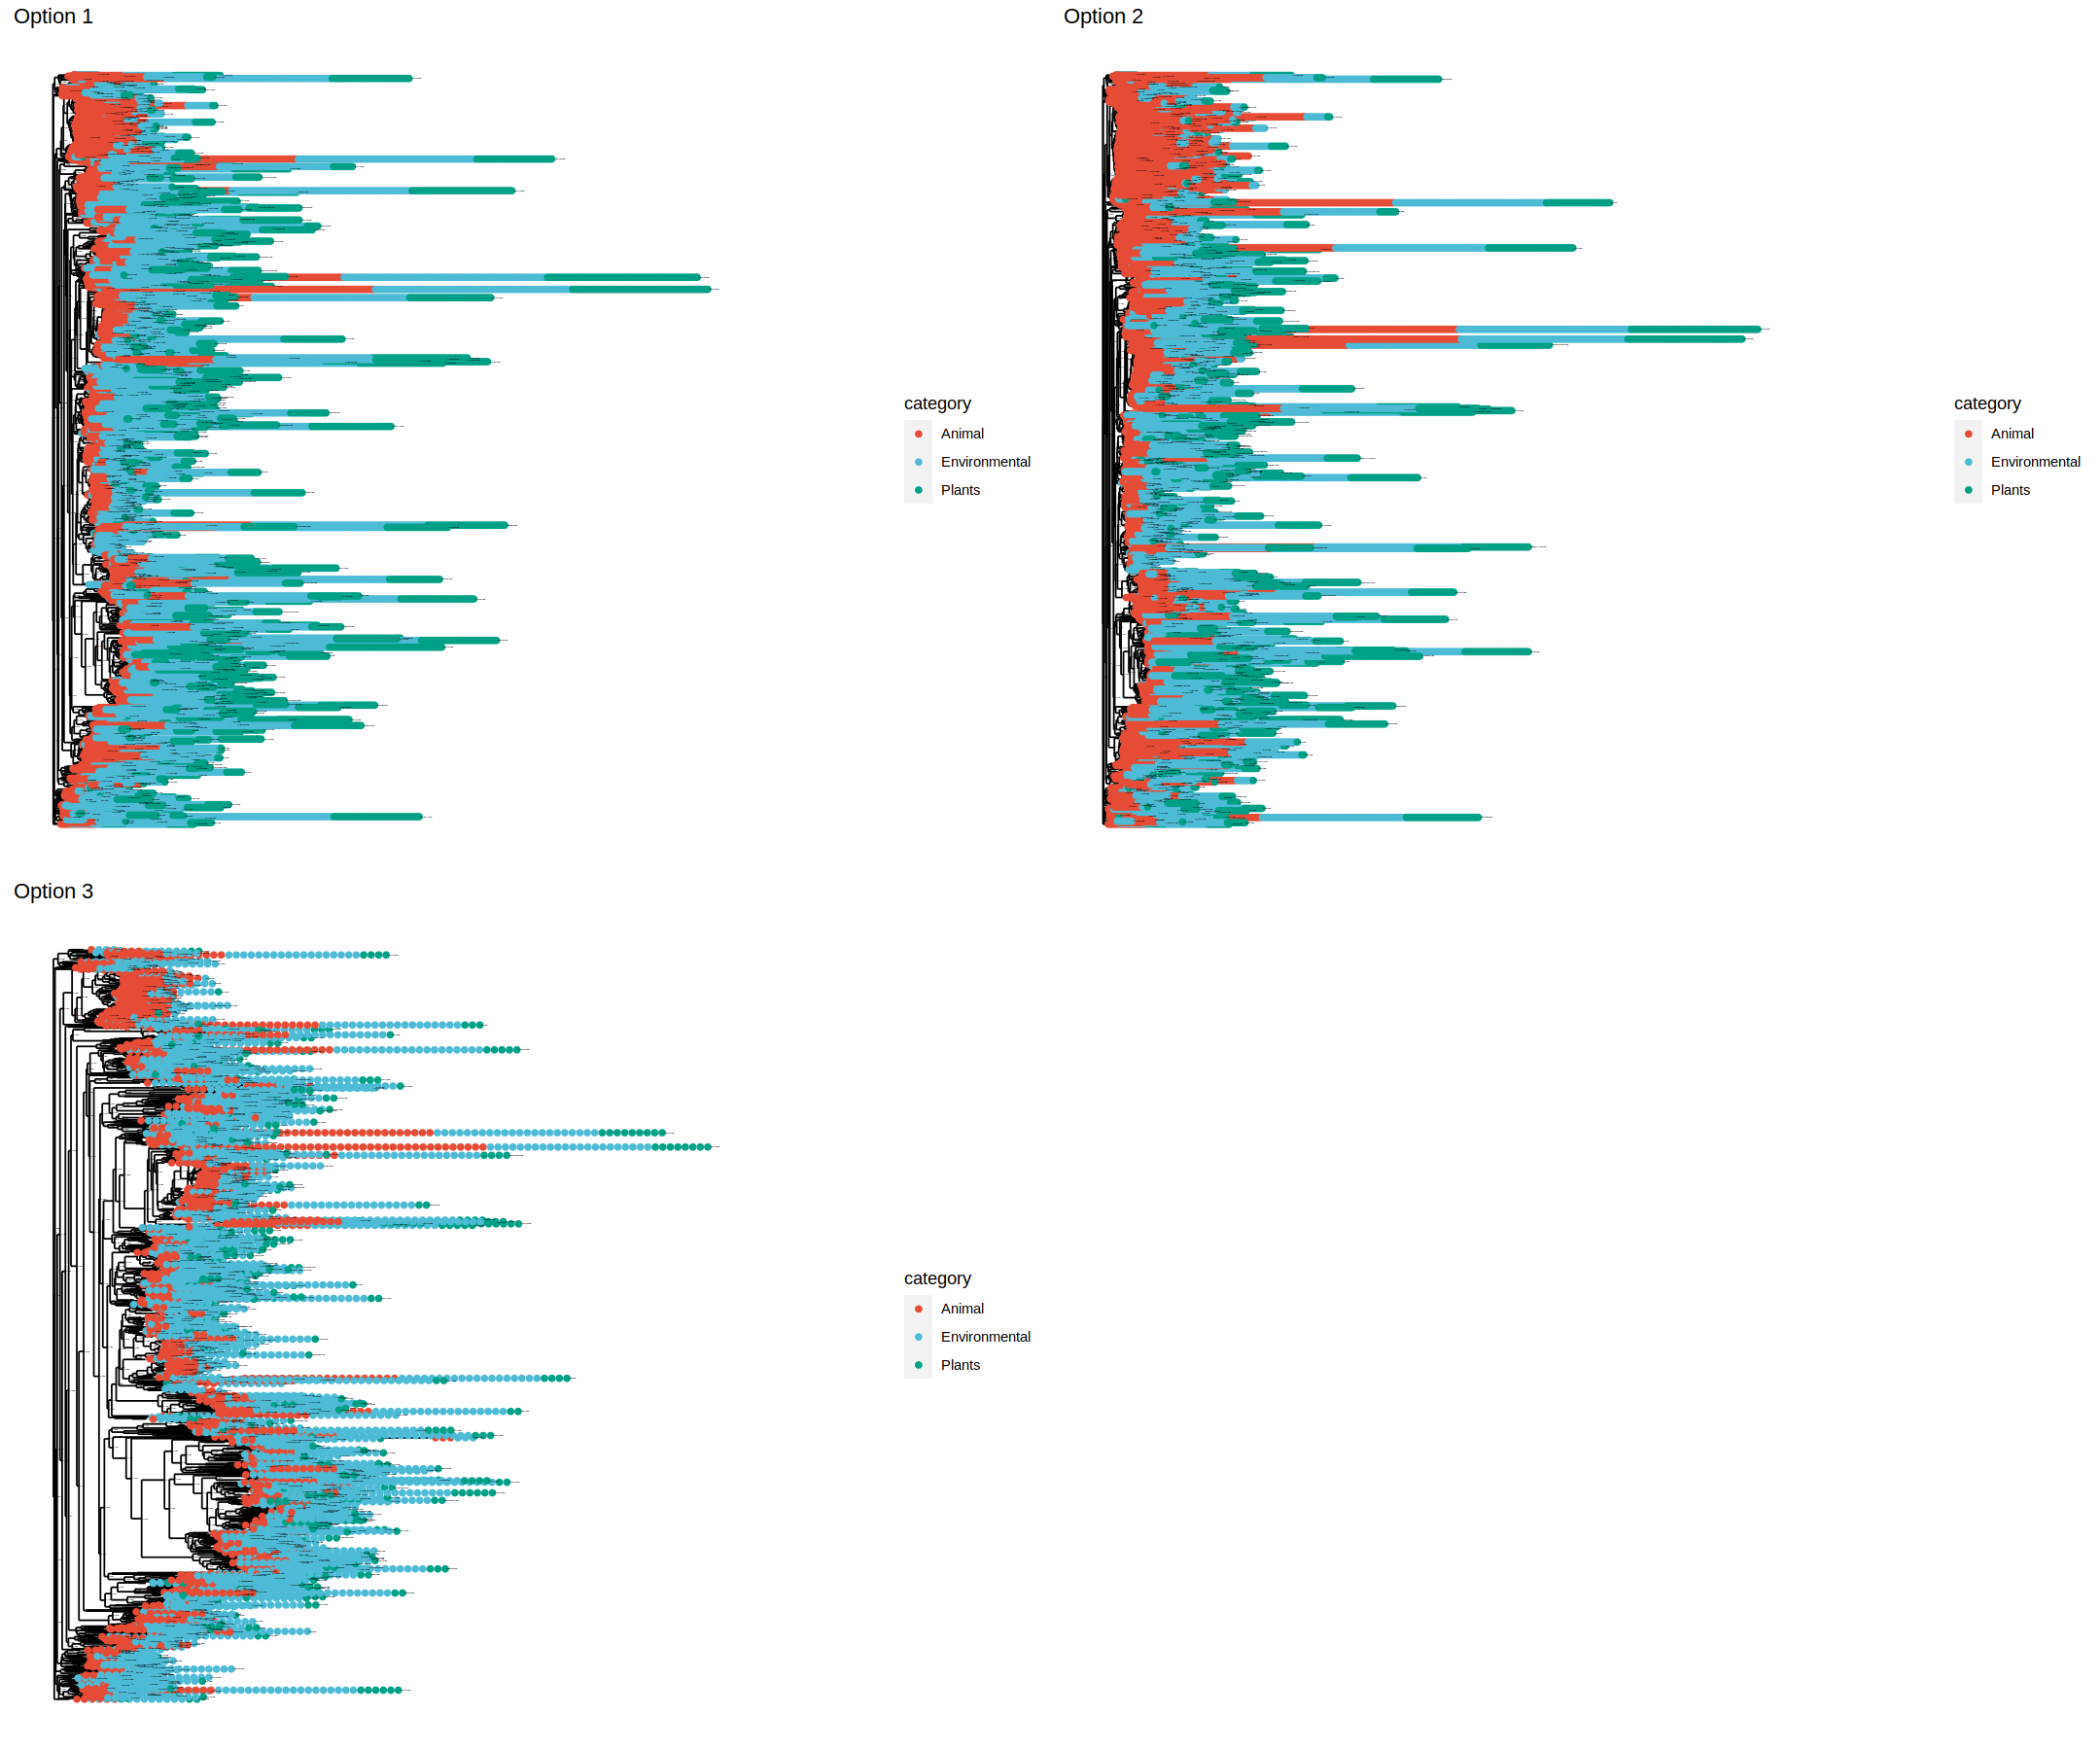

In [697]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(#tre.host.top.0.1,
             tre.top.opt1,
             tre.top.opt2,
             tre.top.opt3,
             nrow=2)